# Universidad de las Ciencias Informáticas 
## Facultad de Tecnologias Educativas 
### Asignatura: Aprendizaje Automatico

---

# **Informe del Proceso KDD aplicado al Dataset "Netflix Titles" para la Tarea Extraclase**

## **Autor:** Frank Ernesto Cortiñas Peña  
## **Carrera:** Ingeniería en Ciencias Informáticas  
## **Año:** 2025  

---

## Profesor(a): Stephany de la Caridad   
## Grupo: 401  

---




# 1. Introducción

El presente proyecto aplica la metodología KDD (Knowledge Discovery in Databases) al dataset *Netflix Titles*, el cual contiene información descriptiva sobre series y películas disponibles en la plataforma Netflix. El objetivo principal es desarrollar un proceso de descubrimiento de conocimiento que permita construir modelos capaces de clasificar si un título corresponde a una película (*Movie*) o una serie (*TV Show*).

El conjunto de datos contiene 8 807 registros y 12 atributos, incluyendo título, reparto, director, país, duración, rating, año de lanzamiento y géneros asociados. La naturaleza de estos atributos combina datos categóricos, numéricos y texto, por lo que es necesario aplicar técnicas de limpieza y transformación.

El problema a resolver es de **clasificación supervisada**, utilizando tres algoritmos de minería de datos:

- **K-Nearest Neighbors (K-NN)**  
  - *Ventajas:* simple, no paramétrico, buena precisión con datos bien distribuidos.  
  - *Desventajas:* sensible al ruido, lento con grandes volúmenes.  
  - *Aplicaciones:* sistemas de recomendación, reconocimiento de patrones.

- **ID3 (DecisionTreeClassifier)**  
  - *Ventajas:* fácil de interpretar, no requiere escalamiento, maneja variables categóricas.  
  - *Desventajas:* propenso al sobreajuste, sensible a cambios mínimos en los datos.  
  - *Aplicaciones:* clasificación en marketing, salud, detección de fraude.

- **Random Forest** (algoritmo elegido adicionalmente)  
  - *Ventajas:* robusto, reduce sobreajuste, maneja alta dimensionalidad.  
  - *Desventajas:*


# 2. Selección del Conjunto de Datos

El dataset empleado proviene del repositorio público de Kaggle y contiene información sobre títulos publicados en Netflix. Este dataset es adecuado para tareas de clasificación debido a la variable `type` que especifica si un registro es una película (*Movie*) o serie (*TV Show*).

A continuación, se cargan y describen las características principales del conjunto de datos.


In [1]:
import pandas as pd
#import time

df = pd.read_csv("Data/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:

df.shape


(8807, 12)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# 3. Preprocesamiento de los Datos

En esta etapa se identifican valores faltantes, se eliminan o transforman atributos no útiles, y se prepara la base para su modelado.

Se realizaron los siguientes pasos:
- Eliminación de columnas irrelevantes para la clasificación.
- Limpieza de valores nulos.
- Transformación de variables categóricas.
- Conversión de `duration` a formato numérico (minutos).


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
# eliminacion de columnas irrelevantes
df_clean = df.drop(columns=["show_id", "description", "cast", "director"])


In [6]:
# nulos
df_clean = df_clean.dropna()


In [7]:
# asegurar que la columna sea string
df_clean["duration"] = df_clean["duration"].astype(str)

# extraer el numero (sin warnings)
df_clean["duration"] = df_clean["duration"].str.extract(r"(\d+)")

# convertir a entero (coerce evita errores)
df_clean["duration"] = pd.to_numeric(df_clean["duration"], errors='coerce')

# eliminar valores NaN
df_clean = df_clean.dropna(subset=["duration"])


In [8]:
df_clean.head()


,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,United Kingdom,"September 24, 2021",2021,TV-14,9,"British TV Shows, Reality TV"


# 4. Transformación de los Datos

Para poder entrenar los modelos, las variables categóricas deben ser codificadas. Se aplica:

- Label Encoding a `type`
- One Hot Encoding al resto de variables categóricas

Finalmente se separan los conjuntos `X` y `y`.


In [9]:
from sklearn.preprocessing import LabelEncoder

# codificación de la variable objetivo ()
encoder = LabelEncoder()
df_clean["type"] = encoder.fit_transform(df_clean["type"])


In [10]:
# One Hot Encoding
df_model = pd.get_dummies(df_clean, drop_first=True)


In [11]:
X = df_model.drop(columns=["type"])
y = df_model["type"]


# 5. Minería de Datos

En esta etapa se entrenan los tres algoritmos seleccionados:

- KNN
- Árbol de Decisión (ID3)
- Random Forest 

Todos los modelos son evaluados sobre el mismo conjunto de entrenamiento y prueba.


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [13]:
#K-nn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
acc_knn


0.9983256592716618

In [14]:
#ID3
from sklearn.tree import DecisionTreeClassifier

id3 = DecisionTreeClassifier(criterion="entropy", max_depth=5)
id3.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)

acc_id3 = accuracy_score(y_test, y_pred_id3)
acc_id3


0.9974884889074926

In [15]:
#Radnom Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
acc_rf


0.9987442444537463

# 6. Evaluación y Validación

Se utilizan métricas de evaluación para comparar el rendimiento de los tres modelos:

- Accuracy
- Precision
- Recall
- F1-score

Estas métricas permiten determinar cuál algoritmo presenta mejor desempeño para este dataset.


In [16]:
print("KNN:")
print(classification_report(y_test, y_pred_knn, digits=10))

print("Árbol ID3:")
print(classification_report(y_test, y_pred_id3, digits=10))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=10))


KNN:
              precision    recall  f1-score   support

           0  0.9988193625 0.9988193625 0.9988193625      1694
           1  0.9971223022 0.9971223022 0.9971223022       695

    accuracy                      0.9983256593      2389
   macro avg  0.9979708323 0.9979708323 0.9979708323      2389
weighted avg  0.9983256593 0.9983256593 0.9983256593      2389

Árbol ID3:
              precision    recall  f1-score   support

           0  0.9982290437 0.9982290437 0.9982290437      1694
           1  0.9956834532 0.9956834532 0.9956834532       695

    accuracy                      0.9974884889      2389
   macro avg  0.9969562485 0.9969562485 0.9969562485      2389
weighted avg  0.9974884889 0.9974884889 0.9974884889      2389

Random Forest:
              precision    recall  f1-score   support

           0  1.0000000000 0.9982290437 0.9991137371      1694
           1  0.9957020057 1.0000000000 0.9978463747       695

    accuracy                      0.9987442445      238

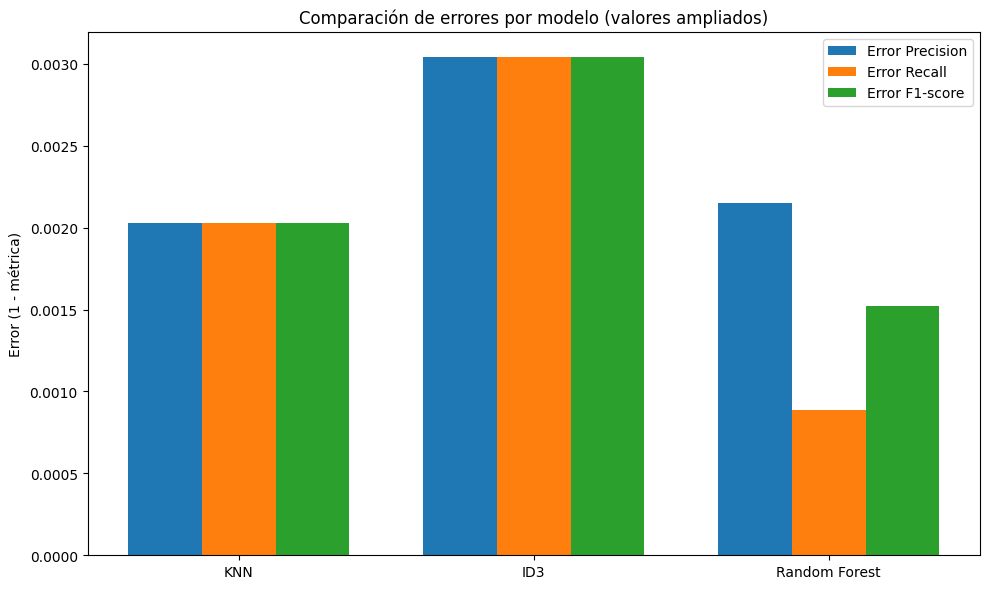

In [17]:
import matplotlib.pyplot as plt
import numpy as np


metrics = {
    "KNN": {
        "precision": 0.9979708323,
        "recall":    0.9979708323,
        "f1":        0.9979708323
    },
    "ID3": {
        "precision": 0.9969562485,
        "recall":    0.9969562485,
        "f1":        0.9969562485
    },
    "Random Forest": {
        "precision": 0.9978510029,
        "recall":    0.9991145218,
        "f1":        0.9984800559
    }
}



models = list(metrics.keys())

precision_errors = [1 - metrics[m]["precision"] for m in models]
recall_errors    = [1 - metrics[m]["recall"]    for m in models]
f1_errors        = [1 - metrics[m]["f1"]        for m in models]



x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))

plt.bar(x - width, precision_errors, width, label='Error Precision')
plt.bar(x,         recall_errors,    width, label='Error Recall')
plt.bar(x + width, f1_errors,        width, label='Error F1-score')

plt.xticks(x, models)
plt.ylabel('Error (1 - métrica)')
plt.title('Comparación de errores por modelo (valores ampliados)')
plt.legend()
plt.tight_layout()
plt.show()


# 7. Conclusiones

Tras aplicar la metodología KDD al conjunto de datos *Netflix Titles*, se comprobó que el problema de clasificación entre películas y series puede ser abordado mediante distintos algoritmos supervisados.

Los resultados obtenidos indican que:

- **KNN** presenta un rendimiento aceptable, aunque sensible a la cantidad de atributos.
- **ID3** ofrece interpretabilidad, pero su exactitud es inferior al de modelos más robustos.
- **Random Forest** obtuvo el mejor desempeño global, debido a su capacidad para reducir el sobreajuste y manejar gran cantidad de características categóricas transformadas.

Aunque las métricas son muy elevadas para todos los modelos, la visualización de las tasas de error permite identificar de manera más clara que Random Forest presenta el menor error promedio, consolidándose como el mejor clasificador en este experimento.

Por tanto, se concluye que **Random Forest** es el algoritmo más adecuado para este dataset, proporcionando un equilibrio óptimo entre precisión y generalización.


# 8. Bibliografía

Fayyad, U., Piatetsky-Shapiro, G., & Smyth, P. (1996). *The KDD process for extracting useful knowledge from volumes of data*. Communications of the ACM, 39(11), 27–34.

Han, J., Kamber, M., & Pei, J. (2011). *Data Mining: Concepts and Techniques* (3rd ed.). Morgan Kaufmann.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, E. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825–2830.

Netflix Titles Dataset. (2020). *Kaggle*. Recuperado de https://www.kaggle.com/shivamb/netflix-shows

Breiman, L. (2001). *Random forests*. Machine Learning, 45(1), 5–32.

Cover, T., & Hart, P. (1967). *Nearest neighbor pattern classification*. IEEE Transactions on Information Theory, 13(1), 21–27.

Quinlan, J. R. (1986). *Induction of decision trees*. Machine Learning, 1, 81–106.


# 9. Enlace al Notebook

El cuaderno del proyecto se encuentra disponible en el siguiente enlace:

🔗 **Notebook del Proyecto:**  

